# Reading Data

In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
!echo '{"username":"sidhsatam","key":"5d2a82f91cf79b90f0b970d302cbabef"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d grassknoted/asl-alphabet

 99% 1.02G/1.03G [00:17<00:00, 65.6MB/s]
100% 1.03G/1.03G [00:17<00:00, 62.0MB/s]


In [0]:
!unzip /content/asl-alphabet.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing191.jpg  
  inflating: asl_alphabet_t

In [0]:
# !rm -rf /content/asl_alphabet_train/asl_alphabet_train/nothing

In [0]:
!rm -rf /content/asl_alphabet_train/asl_alphabet_train/J

In [0]:
!rm -rf /content/asl_alphabet_train/asl_alphabet_train/Z

# Exploring

In [0]:
import os
labels = os.listdir("/content/asl_alphabet_train/asl_alphabet_train")
print("No. of labels: {}".format(len(labels)))
print("-----------------")

for label in labels:
    print("{}, {} files".format(label, len(os.listdir("/content/asl_alphabet_train/asl_alphabet_train/"+label))))

No. of labels: 27
-----------------
I, 3000 files
K, 3000 files
A, 3000 files
H, 3000 files
Y, 3000 files
nothing, 3000 files
D, 3000 files
S, 3000 files
R, 3000 files
G, 3000 files
Q, 3000 files
V, 3000 files
T, 3000 files
M, 3000 files
P, 3000 files
C, 3000 files
B, 3000 files
W, 3000 files
U, 3000 files
E, 3000 files
O, 3000 files
F, 3000 files
space, 3000 files
X, 3000 files
N, 3000 files
del, 3000 files
L, 3000 files


In [0]:
from google.colab.patches import cv2_imshow
import cv2

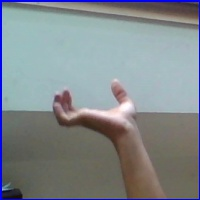

In [0]:
img = cv2.imread("/content/asl_alphabet_train/asl_alphabet_train/space/space996.jpg")
cv2_imshow(img)

In [0]:
os.listdir("/content/asl_alphabet_train/asl_alphabet_train/")

['I',
 'K',
 'A',
 'H',
 'Y',
 'nothing',
 'D',
 'S',
 'R',
 'G',
 'Q',
 'J',
 'V',
 'T',
 'Z',
 'M',
 'P',
 'C',
 'B',
 'W',
 'U',
 'E',
 'O',
 'F',
 'space',
 'X',
 'N',
 'del',
 'L']

In [0]:
img.shape

(200, 200, 3)

# Model Building

In [0]:
from fastai.vision import *
from fastai.metrics import accuracy

In [0]:
path = '/content/asl_alphabet_train/asl_alphabet_train/'
size = 200
bs = 256

In [0]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(do_flip=True, max_warp=0.0, p_lighting=1.0),
                                  valid_pct=0.2, size=size, bs=bs)

In [0]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (64800 items)
x: ImageList
Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200)
y: CategoryList
I,I,I,I,I
Path: /content/asl_alphabet_train/asl_alphabet_train;

Valid: LabelList (16200 items)
x: ImageList
Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200)
y: CategoryList
D,G,del,W,L
Path: /content/asl_alphabet_train/asl_alphabet_train;

Test: None

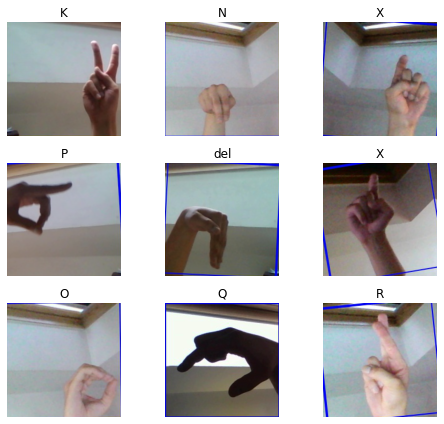

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
learner = cnn_learner(data, models.resnet34, metrics=[accuracy], callback_fns=ShowGraph)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


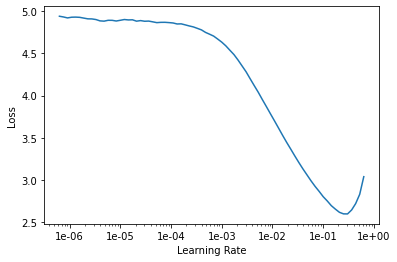

In [0]:
learner.lr_find()
learner.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.194971,0.221352,0.957593,04:52
1,0.687142,3.427316,0.800000,04:55
2,0.817443,0.861984,0.963765,04:56
3,0.524875,1.226756,0.960556,05:01
4,0.284721,0.131385,0.993210,04:54
5,0.105024,0.044085,0.997099,04:54
6,0.032496,0.001953,0.999753,05:02
7,0.011786,0.000224,0.999815,04:59


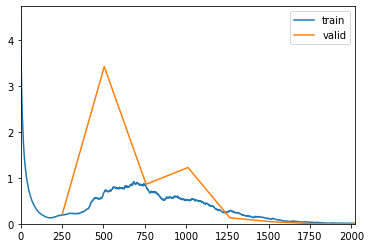

In [0]:
learner.fit_one_cycle(8, max_lr=slice(1e-2,1e-1))

In [0]:
learner.save('/content/asl-frozen')

In [0]:
learner.load('/content/asl-frozen')

Learner(data=ImageDataBunch;

Train: LabelList (64800 items)
x: ImageList
Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200)
y: CategoryList
I,I,I,I,I
Path: /content/asl_alphabet_train/asl_alphabet_train;

Valid: LabelList (16200 items)
x: ImageList
Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200)
y: CategoryList
D,G,del,W,L
Path: /content/asl_alphabet_train/asl_alphabet_train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, m

In [0]:
interp = ClassificationInterpretation.from_learner(learner)
losses, idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

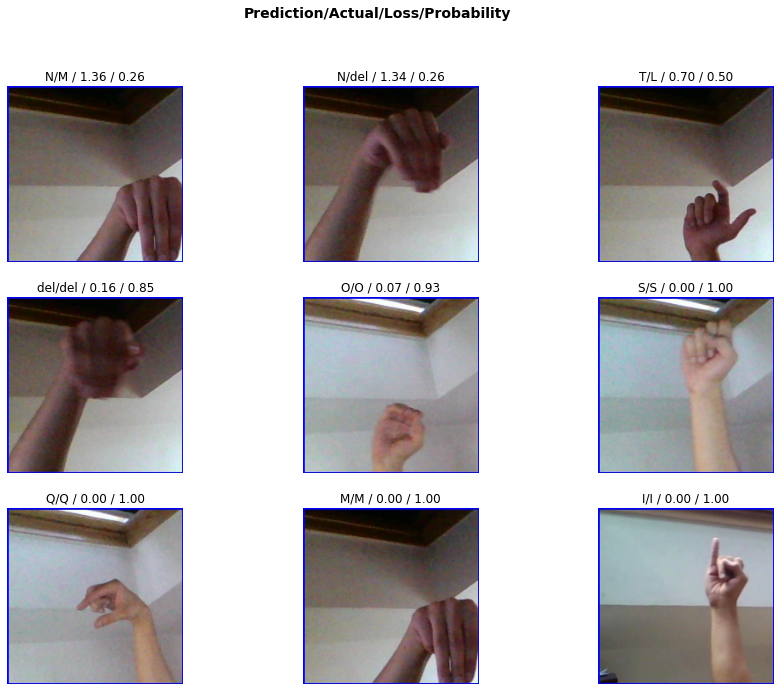

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

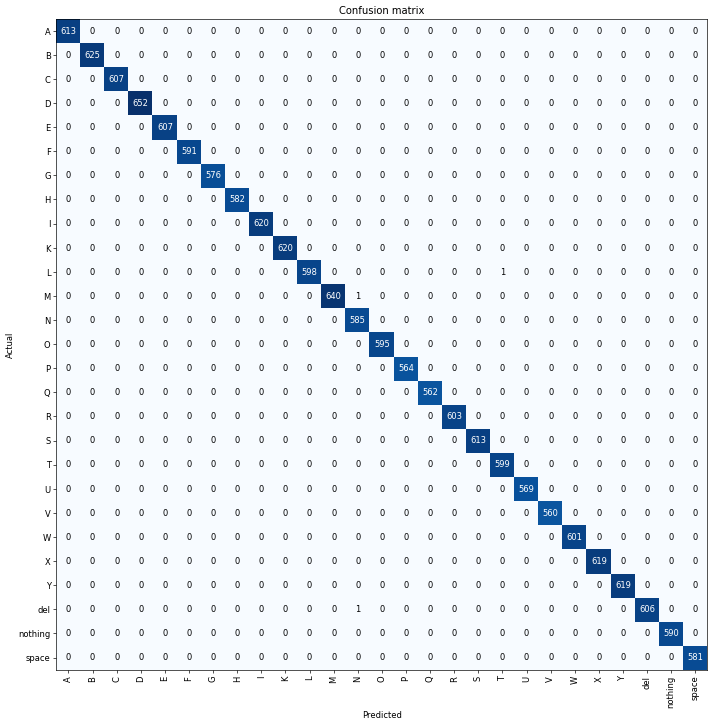

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
interp.most_confused(min_val=1)

[('L', 'T', 1), ('M', 'N', 1), ('del', 'N', 1)]

# Predicting on test data

In [0]:
# from glob import glob
# images=[]
# labels=[]
# for img_path in glob('/content/asl_alphabet_test/asl_alphabet_test/*.jpg'):
#     labels.append(img_path.split('/')[-1].split('_')[0])
#     images.append(open_image(img_path))

In [0]:
from glob import glob
images=[]
labels=[]
for img_path in glob('/content/asl_alphabet_test/asl_alphabet_test/*.jpg'):
    labels.append(img_path.split('/')[-1].split('_')[0])
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))
    img_fastai = Image(pil2tensor(img, dtype=np.float32).div_(255))
    images.append(img_fastai)

In [0]:
# pred_class, pred_idx, outputs = learner.predict(images[0])
# pred_class

In [0]:
# labels[0]

In [0]:
for image, label in zip(images, labels):
    pred_class, pred_idx, outputs = learner.predict(image)
    print(pred_class, label)

Y Y
I Z
V V
nothing nothing
S S
K K
P P
Q Q
G G
C C
I I
H H
space space
B B
M M
E E
V U
L L
A A
T T
F F
W W
X X
O O
D D
R R
N N
Y J


In [0]:
learner.export('/content/asl.pkl')

In [0]:
# !cp /content/export.pkl /content/sample_data/